# ARIMA and Seasonal ARIMA

### Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

#### 1: Visualize the Time Series Data
#### 2: Make the time series data stationary
#### 3: Plot the Correlation and AutoCorrelation Charts
#### 4: Construct the ARIMA Model or Seasonal ARIMA based on the data
#### 5: Use the model to make predictions
    
Let's go through these steps!

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [180]:
df=pd.read_csv('Electric_Production.csv')

In [181]:
## Cleaning up the data
df.dropna()

,DATE,Power Consumption
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


# Step 1: Visualize the data

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE                 397 non-null object
Power Consumption    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [183]:
df.head(5)

,DATE,Power Consumption
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [184]:
df.set_index('DATE',inplace=True)

In [185]:
df.index=pd.to_datetime(df.index)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
Power Consumption    397 non-null float64
dtypes: float64(1)
memory usage: 6.2 KB


In [187]:
df.head()

,Power Consumption
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Text(0, 0.5, 'Power Consumption')

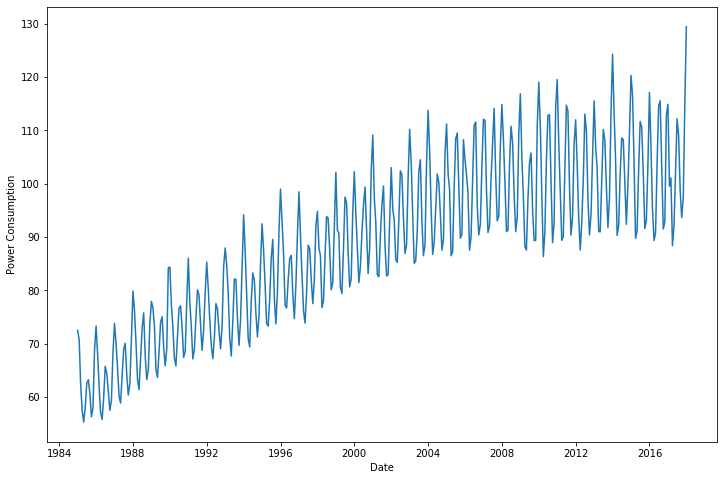

In [188]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Power Consumption')

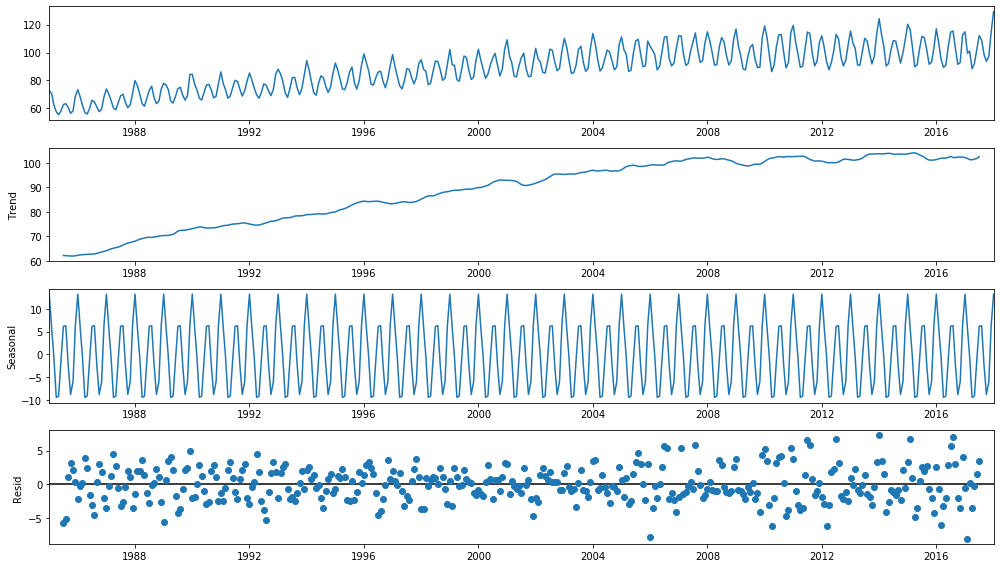

In [189]:
from pylab import rcParams
rcParams['figure.figsize']=(14,8)
df_mul_decompose=seasonal_decompose(df,model='additive')
df_mul_decompose.plot()
plt.show()

### Check for stationarity

In [190]:
from statsmodels.tsa.stattools import adfuller

In [191]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Consumption):
    result=adfuller(Consumption)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [192]:
adfuller_test(df['Power Consumption'])

ADF Test Statistic : -2.2569903500472503
p-value : 0.1862146911658658
#Lags Used : 15
Number of Observations Used : 381
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Step 2: Make the time series data stationary

In [193]:
from pmdarima.arima.utils import ndiffs
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [194]:
df['Seasonal First Difference']=df['Power Consumption']-df['Power Consumption'].shift(12)

In [195]:
df

,Power Consumption,Seasonal First Difference
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN
...,...,...
2017-09-01,98.6154,-4.1483
2017-10-01,93.6137,2.1270
2017-11-01,97.3359,4.4459


In [196]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.673482023381763
p-value : 8.812644938088861e-07
#Lags Used : 12
Number of Observations Used : 372
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


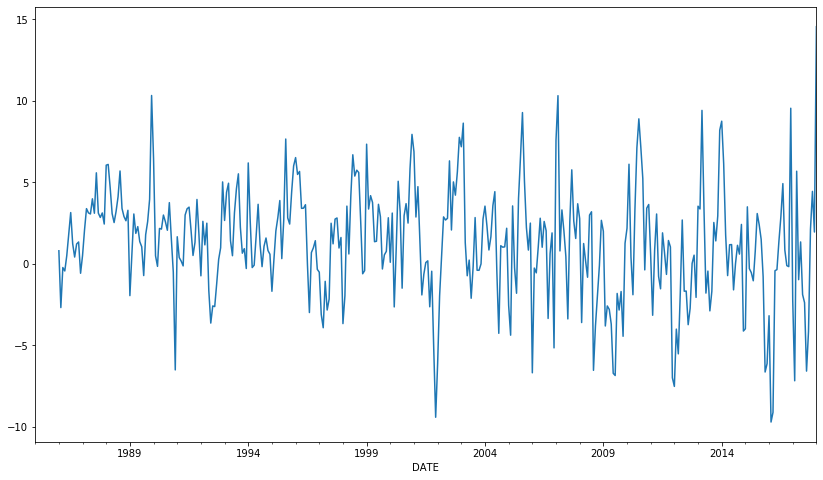

In [197]:
# mean and variance are now stationary
df['Seasonal First Difference'].plot()

# Step 3: Plot the Correlation and AutoCorrelation Charts

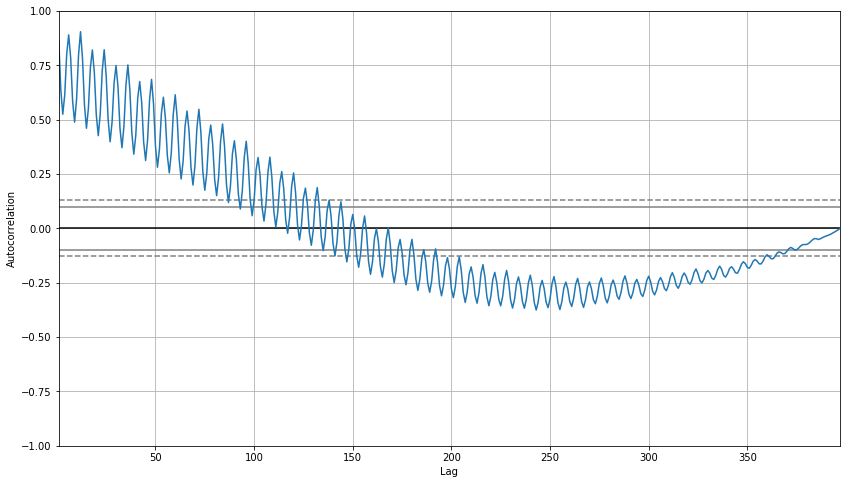

In [198]:
autocorrelation_plot(df['Power Consumption'])
plt.show()

In [199]:
import statsmodels.api as sm

G:\anaconda2\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


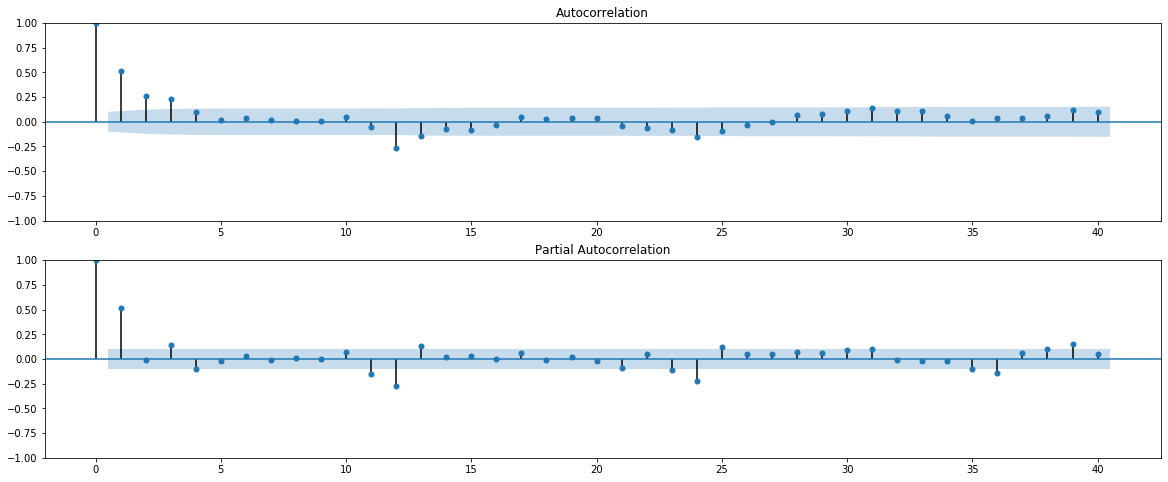

In [200]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

### Final Thoughts on Autocorrelation and Partial Autocorrelation

#### Identification of an AR model is often best done with the PACF.
If the data are from an ARIMA( p, d,0) or ARIMA(0, d,q) model, then the ACF and PACF plots can be helpful in determining the value of p or q. If p and q are both positive, then the plots do not help in finding suitable values of p and q.

### The data may follow an ARIMA( p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

###### -the ACF is exponentially decaying or sinusoidal;
###### -there is a significant spike at lag p in the PACF, but none beyond lag p.


       
### The data may follow an ARIMA(0,d,q) model if the ACF and PACF plots of the differenced data show the following patterns:

###### -the PACF is exponentially decaying or sinusoidal;
###### -there is a significant spike at lag q in the ACF, but none beyond lag q.

#### p,d,q p AR model lags d differencing q MA lags



# Step 4: Construct the ARIMA Model or Seasonal ARIMA based on the data

In [201]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [202]:
model=sm.tsa.arima.ARIMA(df['Power Consumption'],order=(1,1,1))
model_fit=model.fit()

G:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
G:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
G:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [203]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Power Consumption   No. Observations:                  397
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.795
Date:                Mon, 08 Aug 2022   AIC                           2623.589
Time:                        23:06:05   BIC                           2635.533
Sample:                    01-01-1985   HQIC                          2628.321
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.000      36.965      49.885
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.72   Prob(JB):                         0.49
Heteroskedasticity (H):               2.97   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Step 5: Use the model to make predictions

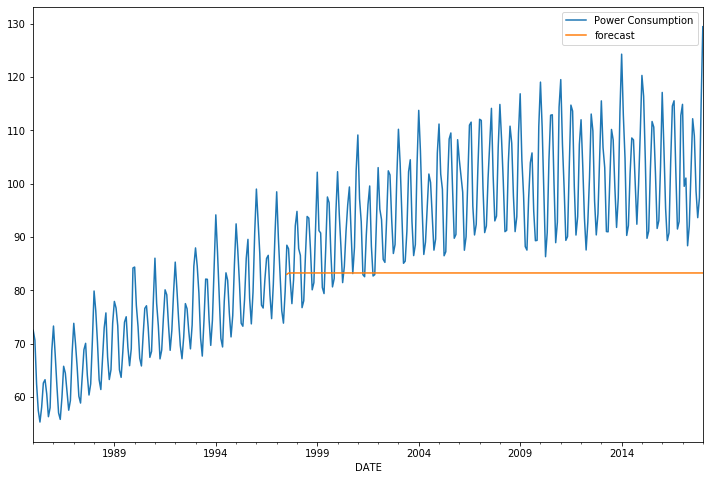

In [204]:
df['forecast']=model_fit.predict(start=150,end=396,dynamic=True)
df[['Power Consumption','forecast']].plot(figsize=(12,8))

In [205]:
# using SARIMA model as data is seasonal
model=sm.tsa.statespace.SARIMAX(df['Power Consumption'],order=(1,1,1),seasonal_order=(1, 1,1,12))
model_fit=model.fit()

G:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
G:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


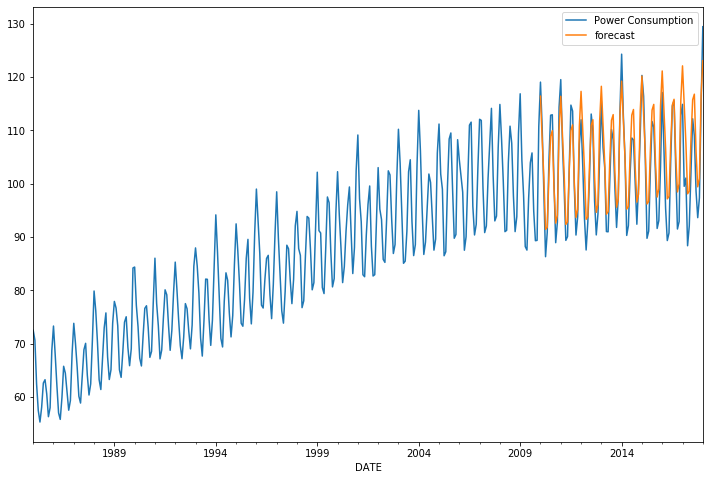

In [206]:
df['forecast']=model_fit.predict(start=300,end=396,dynamic=True)
df[['Power Consumption','forecast']].plot(figsize=(12,8))

In [207]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [208]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [209]:
future_datest_df.tail()

,Power Consumption,Seasonal First Difference,forecast
2019-08-01,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN


In [210]:
future_df=pd.concat([df,future_datest_df])

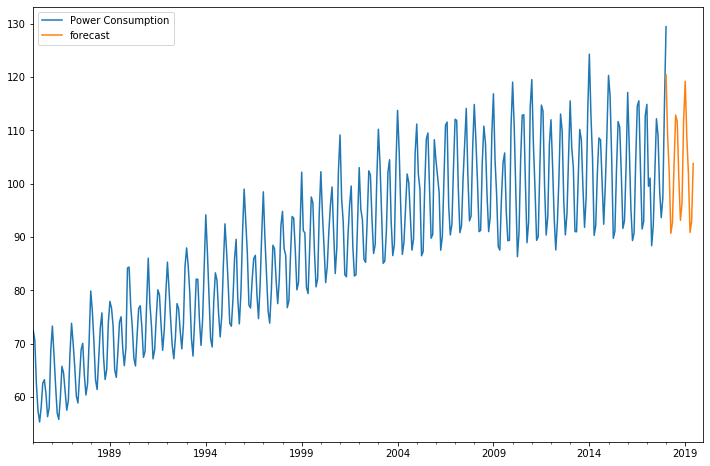

In [211]:
#### We will now predict the power consumption for the next 17 months 
future_df['forecast'] = model_fit.predict(start = 396, end = 413, dynamic= True)  
future_df[['Power Consumption', 'forecast']].plot(figsize=(12, 8)) 